In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

df = pd.DataFrame(np.random.randn(10, 5), columns=list('abcde'))
df.iloc[0:3].plot(y='0')

print(df.iloc[0:3])

plt.show()

KeyError: ignored

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
import warnings
warnings.filterwarnings('ignore')

In [14]:
train_df=pd.read_csv('/content/drive/MyDrive/CSE 4-2/CSE-442/Project Materials/mitbih_train.csv',header=None)
test_df=pd.read_csv('/content/drive/MyDrive/CSE 4-2/CSE-442/Project Materials/mitbih_test.csv',header=None)

In [15]:
train_df[187]=train_df[187].astype(int)
equilibre=train_df[187].value_counts()
print(equilibre)

0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64


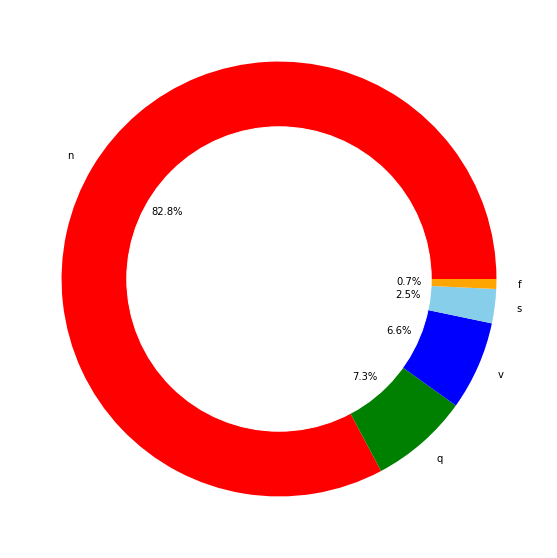

In [ ]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [16]:
from sklearn.utils import resample
df_1=train_df[train_df[187]==1]
df_2=train_df[train_df[187]==2]
df_3=train_df[train_df[187]==3]
df_4=train_df[train_df[187]==4]
df_0=(train_df[train_df[187]==0]).sample(n=20000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=20000,random_state=126)

train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

In [ ]:
equilibre=train_df[187].value_counts()
print(equilibre)

0    20000
1    20000
2    20000
3    20000
4    20000
Name: 187, dtype: int64


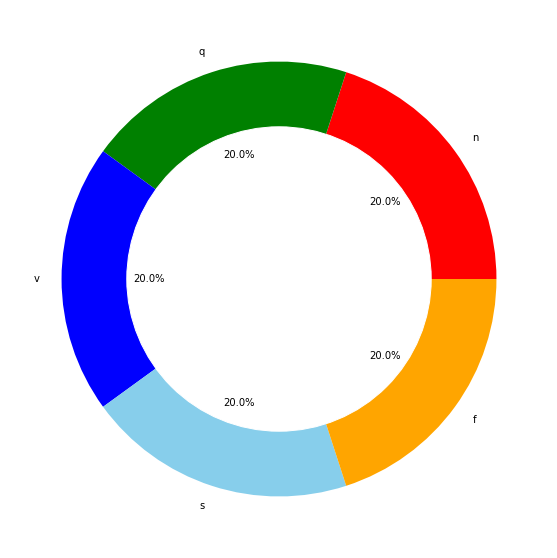

In [ ]:
plt.figure(figsize=(20,10))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=['n','q','v','s','f'], colors=['red','green','blue','skyblue','orange'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [32]:
c=train_df.groupby(187,group_keys=False).apply(lambda train_df : train_df.sample(1))

In [33]:
d=train_df.groupby(187,group_keys=False).apply(lambda train_df : train_df.sample(1))

In [18]:
c

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
37901,0.988176,0.908784,0.354730,0.000000,0.153716,0.241554,0.233108,0.243243,0.250000,0.256757,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
72870,0.929204,0.831858,0.221239,0.030973,0.101770,0.159292,0.123894,0.141593,0.216814,0.172566,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
77850,1.000000,0.951777,0.724619,0.445431,0.269036,0.214467,0.230964,0.247462,0.282995,0.364213,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
80540,0.973913,1.000000,0.626087,0.330435,0.198261,0.165217,0.123478,0.118261,0.102609,0.107826,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
86836,0.788690,0.473214,0.461310,0.434524,0.404762,0.372024,0.336310,0.285714,0.223214,0.101190,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [20]:
d

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
52983,1.000000,0.835366,0.481707,0.222561,0.195122,0.167683,0.149390,0.115854,0.121951,0.100610,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
73874,0.561475,0.459016,0.290984,0.172131,0.090164,0.028689,0.028689,0.024590,0.000000,0.008197,...,0.090164,0.110656,0.102459,0.131148,0.143443,0.184426,0.213115,0.241803,0.233607,1
79912,1.000000,0.921697,0.681892,0.482871,0.349103,0.125612,0.003263,0.000000,0.001631,0.044046,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
80585,1.000000,0.942922,0.748858,0.447489,0.178082,0.140411,0.148402,0.127854,0.103881,0.089041,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3
85569,0.884615,0.670940,0.606838,0.576923,0.512821,0.461538,0.384615,0.311966,0.175214,0.081197,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4


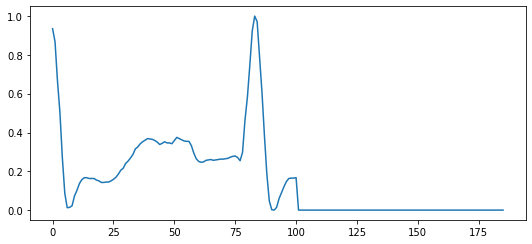

In [34]:
plt.plot(c.iloc[0,:186])

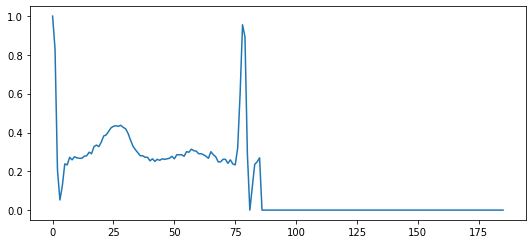

In [35]:
plt.plot(d.iloc[0,:186])

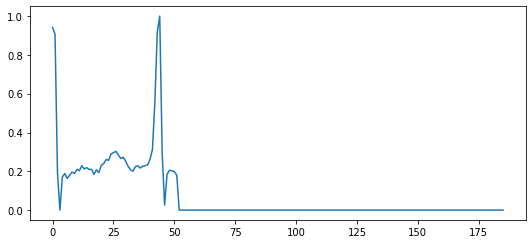

In [36]:
plt.plot(c.iloc[1,:186])

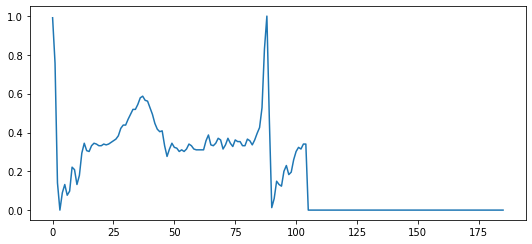

In [37]:
plt.plot(d.iloc[1,:186])

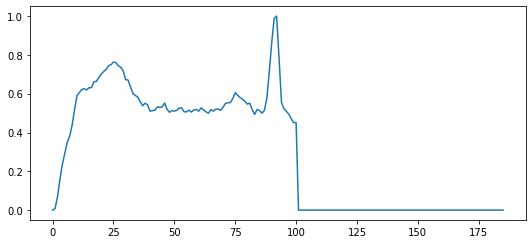

In [38]:
plt.plot(c.iloc[2,:186])

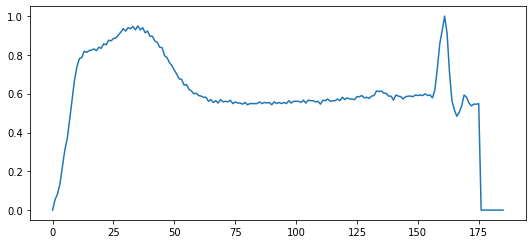

In [39]:
plt.plot(d.iloc[2,:186])

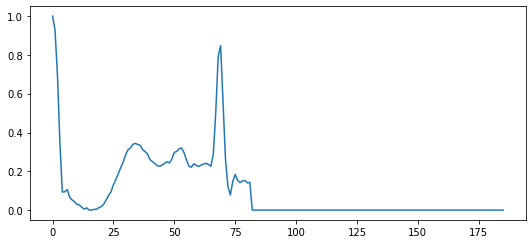

In [40]:
plt.plot(c.iloc[3,:186])

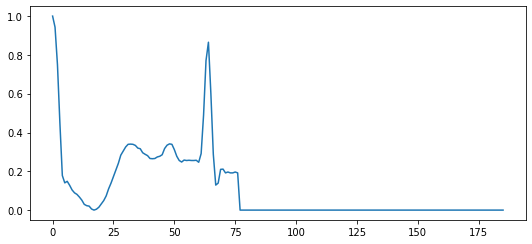

In [28]:
plt.plot(d.iloc[3,:186])

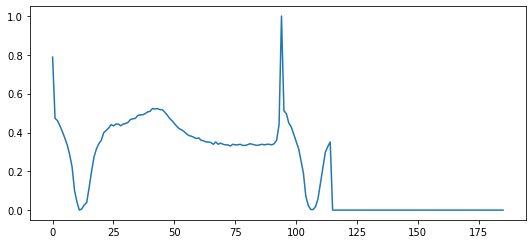

In [29]:
plt.plot(c.iloc[4,:186])

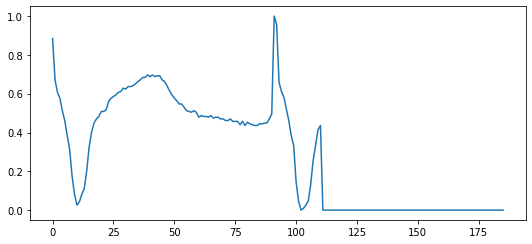

In [30]:
plt.plot(d.iloc[4,:186])

In [ ]:
def add_gaussian_noise(signal):
    noise=np.random.normal(0,0.5,186)
    return (signal+noise)

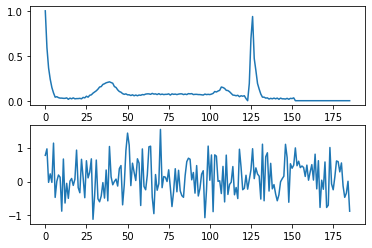

In [ ]:
tempo=c.iloc[0,:186]
bruiter=add_gaussian_noise(tempo)

plt.subplot(2,1,1)
plt.plot(c.iloc[0,:186])

plt.subplot(2,1,2)
plt.plot(bruiter)

plt.show()

In [ ]:
target_train=train_df[187]
target_test=test_df[187]
y_train=to_categorical(target_train)
y_test=to_categorical(target_test)

In [ ]:
X_train=train_df.iloc[:,:186].values
X_test=test_df.iloc[:,:186].values
for i in range(len(X_train)):
    X_train[i,:186]= add_gaussian_noise(X_train[i,:186])
X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)

In [ ]:
from tensorflow.keras.layers import (
    BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
)

In [ ]:
def network(X_train,y_train,X_test,y_test):
    

    im_shape=(X_train.shape[1],1)
    inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')
    conv1_1=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(inputs_cnn)
    conv1_1=BatchNormalization()(conv1_1)
    pool1=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)
    conv2_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool1)
    conv2_1=BatchNormalization()(conv2_1)
    pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_1)
    conv3_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool2)
    conv3_1=BatchNormalization()(conv3_1)
    pool3=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1)
    flatten=Flatten()(pool3)
    dense_end1 = Dense(64, activation='relu')(flatten)
    dense_end2 = Dense(32, activation='relu')(dense_end1)
    main_output = Dense(5, activation='softmax', name='main_output')(dense_end2)
    
    
    model = Model(inputs= inputs_cnn, outputs=main_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])
    
    
    callbacks = [EarlyStopping(monitor='val_loss', patience=8),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

    history=model.fit(X_train, y_train,epochs=40,callbacks=callbacks, batch_size=32,validation_data=(X_test,y_test))
    model.load_weights('best_model.h5')
    return(model,history)

In [ ]:
def evaluate_model(history,X_test,y_test,model):
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    
    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    target_names=['0','1','2','3','4']
    
    y_true=[]
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba=model.predict(X_test)
    prediction=np.argmax(prediction_proba,axis=1)
    cnf_matrix = confusion_matrix(y_true, prediction)
    

In [ ]:
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input
from keras.models import Model
#from keras.layers.normalization import BatchNormalization
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint

model,history=network(X_train,y_train,X_test,y_test)

Epoch 1/40
3125/3125 [==============================] - 68s 22ms/step - loss: 0.9016 - accuracy: 0.6524 - val_loss: 0.8455 - val_accuracy: 0.7288
Epoch 2/40
3125/3125 [==============================] - 66s 21ms/step - loss: 0.7972 - accuracy: 0.6964 - val_loss: 1.4519 - val_accuracy: 0.2841
Epoch 3/40
3125/3125 [==============================] - 67s 21ms/step - loss: 0.7635 - accuracy: 0.7101 - val_loss: 0.8476 - val_accuracy: 0.6913
Epoch 4/40
3125/3125 [==============================] - 66s 21ms/step - loss: 0.7372 - accuracy: 0.7207 - val_loss: 0.9370 - val_accuracy: 0.6133
Epoch 5/40
3125/3125 [==============================] - 66s 21ms/step - loss: 0.7112 - accuracy: 0.7310 - val_loss: 0.9042 - val_accuracy: 0.6262
Epoch 6/40
3125/3125 [==============================] - 74s 24ms/step - loss: 0.6860 - accuracy: 0.7405 - val_loss: 0.9462 - val_accuracy: 0.6489
Epoch 7/40
3125/3125 [==============================] - 67s 21ms/step - loss: 0.6596 - accuracy: 0.7502 - val_loss: 0.9442 -

In [ ]:
model.save('/content/drive/MyDrive/CSE 4-2/CSE-442/Project Materials/my_model.h5') 

In [ ]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tensorflow.keras.models.load_model('/content/drive/MyDrive/CSE 4-2/CSE-442/Project Materials/my_model.h5')

Accuracy: 84.88%


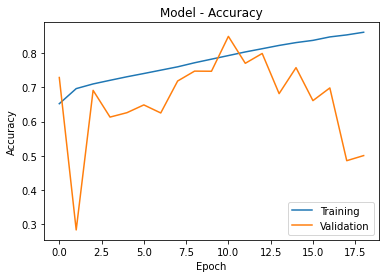

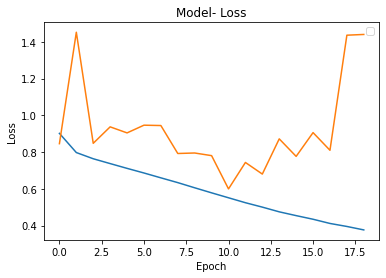

685/685 [==============================] - 4s 5ms/step


In [ ]:
evaluate_model(history,X_test,y_test,model)
y_pred=model.predict(X_test)

Normalized confusion matrix


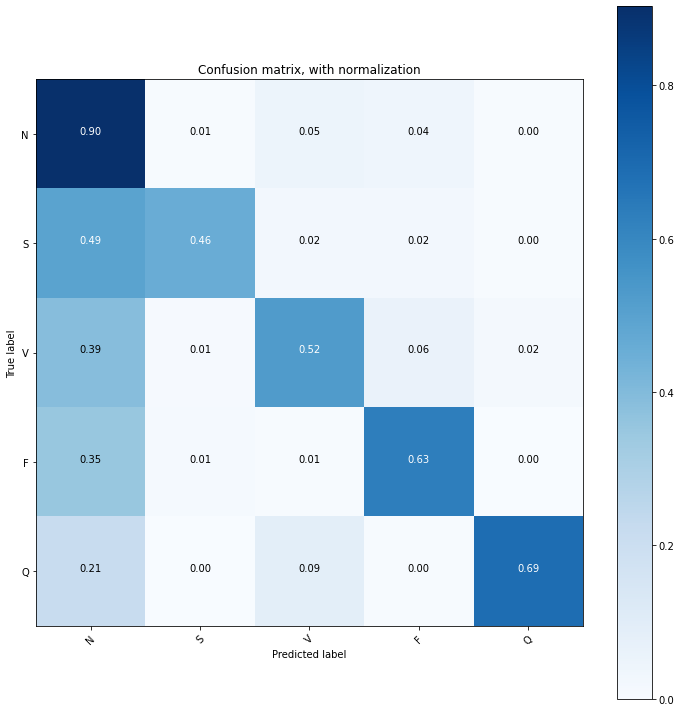

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()